## Interest Points and Matching

### Imports

In [100]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

print('OpenCV version: {}'.format(cv2.__version__))

OpenCV version: 3.3.1


### Load images

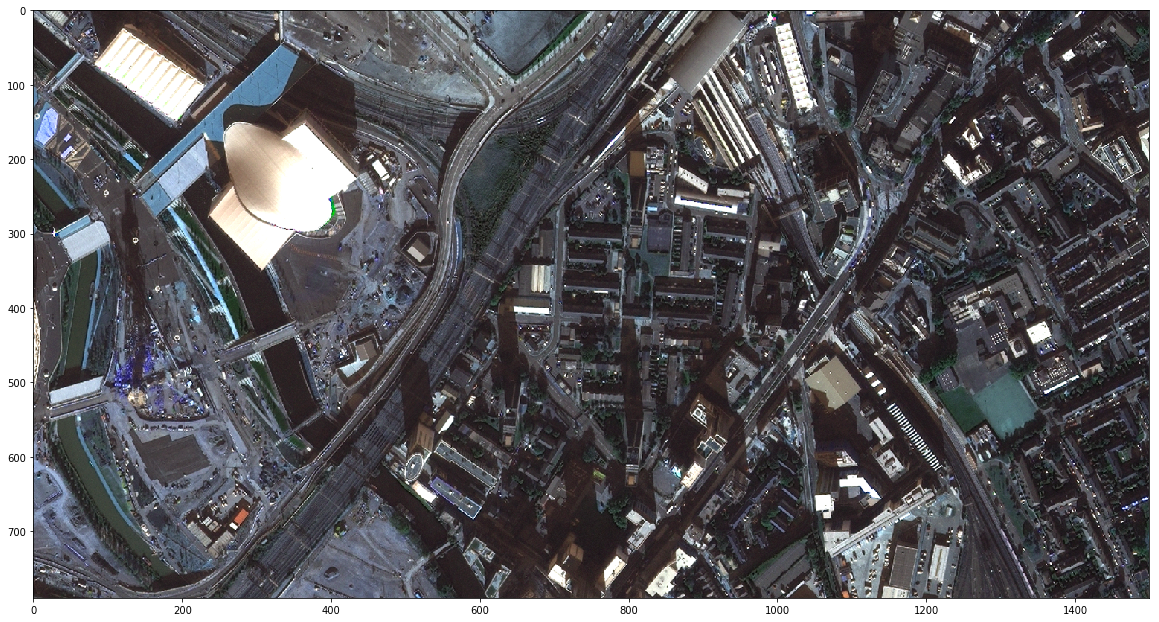

Left image size: (790, 1500, 3)
Right image size: (791, 1500, 3)


In [101]:
left = cv2.imread(r'Picture2.png')
right = cv2.imread(r'Picture3.png')
plt.figure(figsize = (20,20))
plt.imshow(left)
plt.show()

print('Left image size: {}'.format(left.shape))
print('Right image size: {}'.format(right.shape))

# convert to greyscale
left_g = cv2.cvtColor(left, cv2.COLOR_BGR2GRAY)
right_g = cv2.cvtColor(right, cv2.COLOR_BGR2GRAY)

### Extract key-points and descriptors using ORB (Oriented FAST and Rotated BRIEF)

In [102]:
#ORB is limited to 500 feature points by default (can be changed)
orb = cv2.ORB_create(nfeatures=500)
left_p, left_d = orb.detectAndCompute(left_g, None)
right_p, right_d = orb.detectAndCompute(right_g, None)

print('no. of keypoints left: {}, right:{}'.format(len(left_p), len(right_p)))

no. of keypoints left: 500, right:500


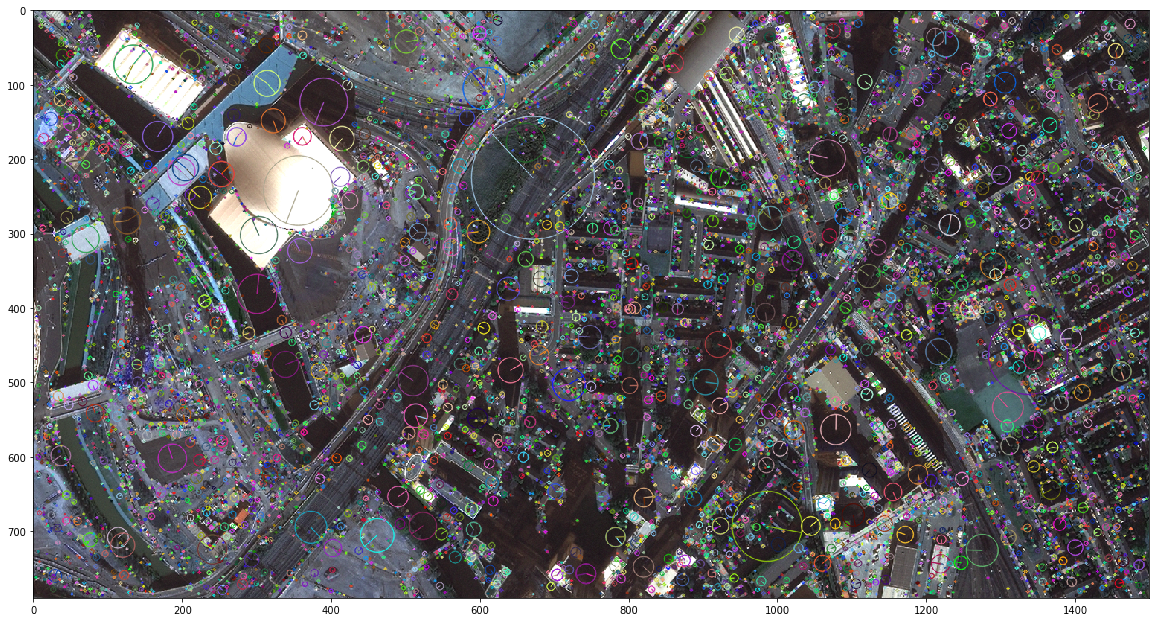

no. of SIFT keypoints left: 12634, right:14798


In [108]:
sift = cv2.xfeatures2d.SIFT_create()
left_p, left_d = sift.detectAndCompute(left_g, None)
right_p, right_d = sift.detectAndCompute(right_g, None)

result = cv2.drawKeypoints(left, left_p, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (20,20))
plt.imshow(result)
plt.show()

print('no. of SIFT keypoints left: {}, right:{}'.format(len(left_p), len(right_p)))

### Match descriptors

In [104]:
#matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) # so called brute force (BF) matcher
matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True) # so called brute force (BF) matcher
matches = matcher.match(left_d, right_d)

print('no. of matches: {}'.format(len(matches)))

# Sort the matches by Euclidean distance
matches = sorted(matches, key=lambda x:x.distance)

no. of matches: 8121


### Draw points
 Draw the matches (only the first n=50) 

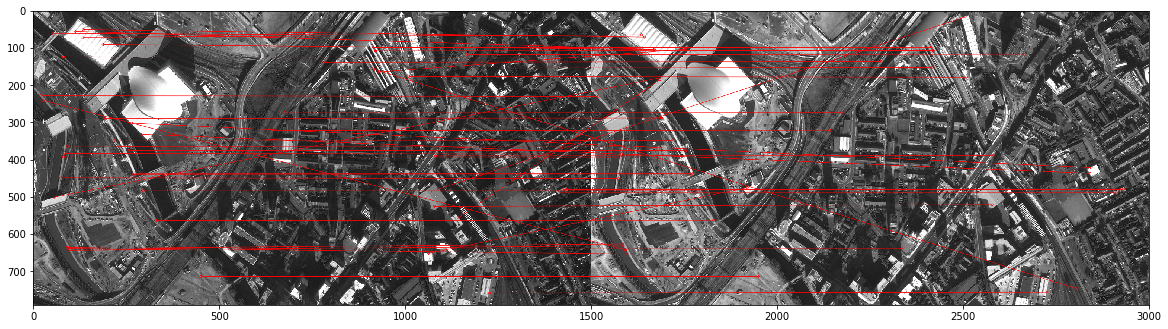

In [105]:
n=50
result = cv2.drawMatches(left_g, left_p, right_g, right_p, matches[:n], 
                         None, (256, 0, 0), flags=2)
plt.figure(figsize = (20,20))
plt.imshow(result)
plt.show()